# Analyzing the Evolution of the Euro Exchange Rate

In this project, we're going to analyze a dataset that describes daily exchange rates between 1999 and 2021 for the Euro currency. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

#### Important note: If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro, therefore, one euro has more value than one US dollar at this exchange rate).

The first thing we'll do is import `pandas`, `matplotlib.pyplot`, and `matplotlib.style`. Then, we'll use the magic command `%matplotlib inline` so that we can see our data visualizations inside the jupyter notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

Next, we'll read the csv file into a pandas dataframe object so that we can explore and clean the data before visualizing it.

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2024.csv')

In [3]:
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2024-04-11,1.6448,1.9558,5.4468,1.4688,0.9787,7.7646,NaN,25.392,7.4604,...,4.9713,NaN,11.531,1.4518,NaN,NaN,39.22,34.6336,1.0729,20.1614
1,2024-04-10,1.6399,1.9558,5.433,1.4728,0.981,7.8548,NaN,25.368,7.4594,...,4.9690,NaN,11.4345,1.4605,NaN,NaN,39.536,35.0329,1.086,20.0851
2,2024-04-09,1.6407,1.9558,5.4489,1.4749,0.9819,7.8603,NaN,25.38,7.459,...,4.9682,NaN,11.4555,1.4623,NaN,NaN,39.529,34.9828,1.0867,20.0861
3,2024-04-08,1.6433,1.9558,5.4806,1.4715,0.9807,7.8282,NaN,25.354,7.4588,...,4.9681,NaN,11.4675,1.4607,NaN,NaN,39.769,34.8481,1.0823,20.1574
4,2024-04-05,1.6461,1.9558,5.4633,1.4702,0.9793,7.8421,NaN,25.286,7.459,...,4.9677,NaN,11.526,1.4608,NaN,NaN,39.743,34.6312,1.0841,20.171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6530,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6531,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6532,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6533,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6535 non-null   object 
 1   [Australian dollar ]      6535 non-null   object 
 2   [Bulgarian lev ]          6133 non-null   object 
 3   [Brazilian real ]         6267 non-null   object 
 4   [Canadian dollar ]        6535 non-null   object 
 5   [Swiss franc ]            6535 non-null   object 
 6   [Chinese yuan renminbi ]  6267 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6535 non-null   object 
 9   [Danish krone ]           6535 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6535 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6535 non-null   object 
 14  [Croatia

It appears that there are 5699 rows × 41 columns. Some of the columns do not have 5699 records, which means that this dataset does indeed have some null values. The datatypes for the columns are floats and objects.

Before we can create any visualizations, we'll need to clean this dataset. In the code below, we'll rename some columns. After renaming the columns, we'll convert the Time column to datetime data type.

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time'}, inplace=True)

In [6]:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

In [7]:
exchange_rates

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,2024-04-11,1.6448,1.9558,5.4468,1.4688,0.9787,7.7646,NaN,25.392,7.4604,...,4.9713,NaN,11.531,1.4518,NaN,NaN,39.22,34.6336,1.0729,20.1614
1,2024-04-10,1.6399,1.9558,5.433,1.4728,0.981,7.8548,NaN,25.368,7.4594,...,4.9690,NaN,11.4345,1.4605,NaN,NaN,39.536,35.0329,1.086,20.0851
2,2024-04-09,1.6407,1.9558,5.4489,1.4749,0.9819,7.8603,NaN,25.38,7.459,...,4.9682,NaN,11.4555,1.4623,NaN,NaN,39.529,34.9828,1.0867,20.0861
3,2024-04-08,1.6433,1.9558,5.4806,1.4715,0.9807,7.8282,NaN,25.354,7.4588,...,4.9681,NaN,11.4675,1.4607,NaN,NaN,39.769,34.8481,1.0823,20.1574
4,2024-04-05,1.6461,1.9558,5.4633,1.4702,0.9793,7.8421,NaN,25.286,7.459,...,4.9677,NaN,11.526,1.4608,NaN,NaN,39.743,34.6312,1.0841,20.171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6530,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6531,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6532,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6533,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [8]:
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In the code above, we did the following:

* We renamed the `[US dollar]` amd `Period\Unit:` columns to something easier to type -- `US_dollar` and `Time`
* We change the `Time` column to a `datetime` data type
* We sort the values by `Time` in ascending order
* We reset the index (and drop the initial index)

Now that we've cleaned the data, we'll isolate the exchange rate data that we want to focus on by creating a new dataframe.

In [20]:
euro_to_dollar = exchange_rates[['Time','US_dollar']].copy()

<class 'pandas.core.frame.DataFrame'>


Now that we've created a new dataframe, let's explore the data a little further and see what kind of numbers we're working with. We'll use value_counts to make sure that all of the data within is float data and nothing else.

In [10]:
euro_to_dollar['US_dollar'].value_counts()

US_dollar
-         62
1.2276     9
1.0808     8
1.1215     8
1.0867     8
          ..
1.4579     1
1.4607     1
1.4639     1
1.4651     1
1.086      1
Name: count, Length: 3785, dtype: int64

Red Alert!! By using the value counts function, we can see that there are 62 records where the US_dollar column contains a dash (-). A dash is not a float so our calculations will be faulty if we start creating visualizations right now. We'll hold off on creating visuals and clean the dataset more. We'll use a boolean filter to select all the records that do not contain a dash in the US_dollar column.

In [27]:
euro_to_dollar_boolean = euro_to_dollar['US_dollar'] != '-'
euro_to_dollar_filtered = euro_to_dollar[euro_to_dollar_boolean]
euro_to_dollar_filtered.value_counts('US_dollar')

US_dollar
1.2276    9
1.1215    8
1.0808    8
1.0867    8
1.1268    7
         ..
1.1451    1
1.1454    1
1.1455    1
1.1457    1
1.5990    1
Name: count, Length: 3773, dtype: int64

In [12]:
euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
6530,2024-04-05,1.0841
6531,2024-04-08,1.0823
6532,2024-04-09,1.0867
6533,2024-04-10,1.0860


In [13]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6473 entries, 0 to 6534
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6473 non-null   datetime64[ns]
 1   US_dollar  6473 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 151.7 KB


SUCCESS! By using a boolean filter, we have successfully filtered and dropped all the rows that have dashes, since those rows would be useless and damaging to our analysis. Now each column has only ONE DATATYPE contained within it.

Now that the dataset is clean, we can create a quick visual to see how our data looks.

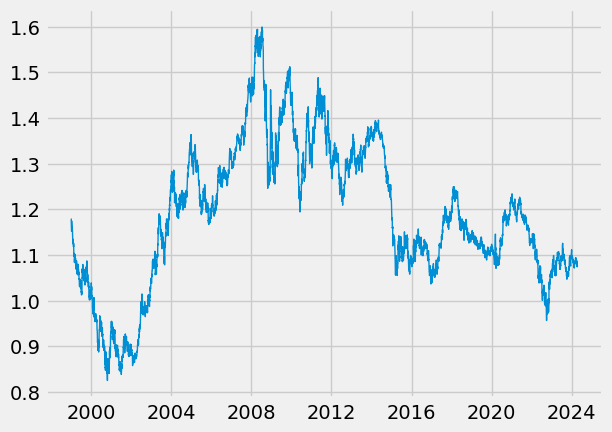

In [28]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'],linewidth=1)

plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).

Since we want to focus on the great recession, we'll create a new dataframe called snippet. 

In [15]:
snippet = euro_to_dollar[euro_to_dollar['Time'].between(pd.to_datetime('2005-11-20'),pd.to_datetime('2010-01-01'))]

In [16]:
snippet

,Time,US_dollar
1795,2005-11-21,1.1811
1796,2005-11-22,1.1701
1797,2005-11-23,1.1776
1798,2005-11-24,1.1783
1799,2005-11-25,1.1763
...,...,...
2863,2009-12-24,1.4398
2865,2009-12-28,1.4405
2866,2009-12-29,1.4433
2867,2009-12-30,1.4338


In the code below, we're going to build our line plot.

Here's a very helpful hint: use the axes.get_xticks()/axes.get_yticks() method to get an idea of the coordinates on your plot. That way if you need to add text to the plot, you have a ballpark estimate of what coordinates to use for your text.

Text(12990, 1.04, '©Reese Oliver                                                         Source: European Central Bank')

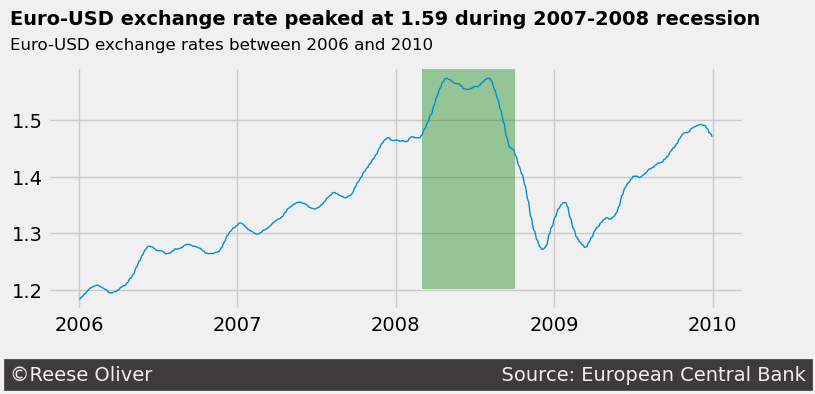

In [30]:
#change the style of the plot
style.use('fivethirtyeight')

#use the plt.subplots() function to instantiate a figure and axes object to create a plot
fig, ax = plt.subplots(figsize=(8,3))

#the line plot is coded below, we incorporate a rolling 30 day average
ax.plot(snippet['Time'], snippet['US_dollar'].rolling(30).mean(),linewidth=1)

#set the x-ticks
ax.set_xticks(pd.to_datetime(['2006-01-01','2007-01-01','2008-01-01','2009-01-01','2010-01-01']))

ax.set_xticklabels(['2006','2007','2008','2009','2010'])

ax.axvspan(pd.to_datetime('2008-03-01'),pd.to_datetime('2008-10-01'), ymin=0.09,
           alpha=0.375, color='green')

ax.text(12990, 1.67, s="Euro-USD exchange rate peaked at 1.59 during 2007-2008 recession", weight='bold')
ax.text(12990, 1.625, s="Euro-USD exchange rates between 2006 and 2010", size=12)
ax.text(12990, 1.04, s='©Reese Oliver' + ' ' *57 + 'Source: European Central Bank', color='#f5eeed', backgroundcolor='#3d3b3b')

NOTE: Depending on the display size of the computer you are viewing this notebook with, the code may not run properly. Sometimes the x-coordinates on the plot will change depending on the computer you are viewing the notebook with. Below, I've used the axes.get_xticks() function so that you can see the x_coordinates of the graph. If the graph has different x_ticks in the axes.text() functions, the entire code will throw an error. Update the axes.text() methods if necessary.

In [18]:
ax.get_xticks()

array([13149., 13514., 13879., 14245., 14610.])

In the example below, I include the same graph, but I make a very significant change to the implentation of the `axes.text()` methods. 

Instead of using x-coordinates, I use the `pd.to_datetime()` function and pass a date string as an argument to the function, which converts the date string into a datetime object. Why bother doing this? 1) The first graph sometimes does not show properly on different computers. 2) Because the x-axis of the graph is made entirely of datetime objects, we can use a datetime object for the plotting of our text on the graph.

Text(2005-08-01 00:00:00, 1.04, '©Reese Oliver                                                         Source: European Central Bank')

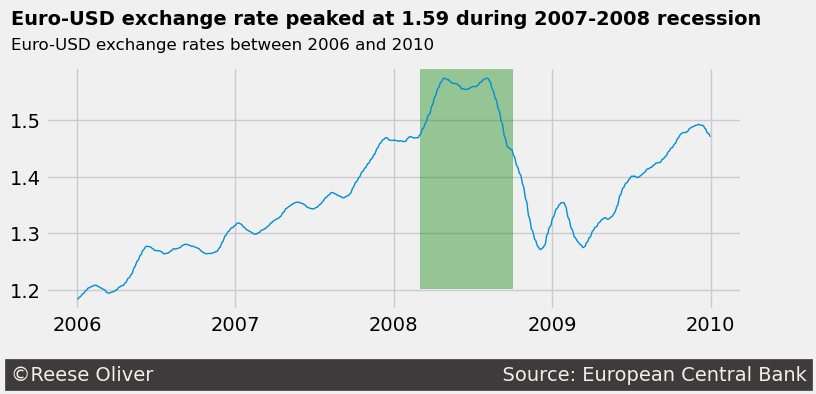

In [19]:
#change the style of the plot
style.use('fivethirtyeight')

#use the plt.subplots() function to instantiate a figure and axes object to create a plot
fig, ax = plt.subplots(figsize=(8,3))

#the line plot is coded below, we incorporate a rolling 30 day average
ax.plot(snippet['Time'], snippet['US_dollar'].rolling(30).mean(),linewidth=1)

#set the x-ticks
ax.set_xticks(pd.to_datetime(['2006-01-01','2007-01-01','2008-01-01','2009-01-01','2010-01-01']))

ax.set_xticklabels(['2006','2007','2008','2009','2010'])

ax.axvspan(pd.to_datetime('2008-03-01'),pd.to_datetime('2008-10-01'), ymin=0.09,
           alpha=0.375, color='green')

ax.text(pd.to_datetime('2005-08-01'), 1.67, s="Euro-USD exchange rate peaked at 1.59 during 2007-2008 recession", weight='bold')
ax.text(pd.to_datetime('2005-08-01'), 1.625, s="Euro-USD exchange rates between 2006 and 2010", size=12)
ax.text(pd.to_datetime('2005-08-01'), 1.04, s='©Reese Oliver' + ' ' *57 + 'Source: European Central Bank', color='#f5eeed', backgroundcolor='#3d3b3b')